In [3]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%run std_libraries.py
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
%matplotlib inline
#%matplotlib notebook

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = othera
base directory is C:\Users\BMH_work\github\yeast_esr_expression_analysis
Importing yeast_esr_exp and setting base_dir and data_processing_dir
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# # %load std_libraries.py
# #to keep my scripts consistent, I am adding this to the top of all scripts with %load std_libraries.py
# import sys
# #Indicate operating environment and import core modules
# location_input = input("what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = other")
# location_dict = {'a': "C:\\Users\\BMH_work\\github\\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data",
#                  'c': "C:\\Users\\Ben\\Documents\\GitHub\\expression_broad_data", 'd':'you need to add your location to the location_dict'}
# base_dir = location_dict[location_input]
# print("base directory is " + base_dir)

# if sys.path[-1] != base_dir:
#     sys.path.append(base_dir)
#     print("Added " + base_dir + " to path: " )
#     print(sys.path)

# import os

# print("I am about to import a library")
# from core import expression_plots 
# from core import io_library 
# %load_ext autoreload
# %autoreload 2
# # %matplotlib 
# # plt.ioff()
# #%matplotlib inline
# %matplotlib notebook
# data_processing_dir = base_dir + os.sep + os.path.normpath("expression_data") + os.sep

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# #import matplotlib.colormap as cm
# #from matplotlib_venn import venn2
# #for my windows10 laptop I had to install this package using pip rather than anaconda.  
# import seaborn as sns; sns.set(style="ticks", color_codes=True)
# #from sklearn import linear_model
# #import pickle
# #import subprocess
# #import networkx as nx
# #import scipy.stats as stats
# #import statsmodels.api as sm
# #import scipy.spatial.distance as spd
# #import statsmodels.graphics.gofplots as stats_graph
# import scipy.cluster.hierarchy as sch

# # from Bio import SeqIO
# # from Bio import SeqFeature as sf
# # from Bio.Alphabet import generic_dna
# # from Bio.Seq import Seq

# # import re

# from collections import Counter, OrderedDict
# # import scipy.stats as stats
# # from itertools import chain
# #from itertools import product
# #this only works if you are online
# online_input = input("are you online? Yes/No ")
# if online_input == "Yes": 
#     import plotly.plotly as py
#     import plotly.graph_objs as pygo
#     import plotly.tools as pytools
#     py.sign_in('heineike02_student','9dMTMZgJMgUP0YX0P5mQ')
#     #py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')
    
# # # for phylogenetic trees: 
# # from ete3 import Tree, SeqMotifFace, TreeStyle, add_face_to_node  #the last three are for visualization
# # # In order to view ete3 created trees on the gpucluster, you need to use a virtual X server:
# # from pyvirtualdisplay import Display
# # display = Display(visible=False, size=(1024, 768), color_depth=24)
# # display.start()
# #ete3 is not officially supported on windows, and so must be loaded via pip: 
# # pip install -U https://github.com/etetoolkit/ete/archive/qt5.zip
# # ref: https://groups.google.com/forum/#!topic/etetoolkit/6NblSBPij4o

# #for scraping internet data (e.g. ncbi)
# #import requests
# #from lxml import etree    #parses xml output

# spec_lookup = {'Klac' : 'Kluyveromyces lactis', 'Scer': 'Saccharomyces cerevisiae', 
#  'Cgla' : 'Candida glabrata' , 'Ncas': 'Naumovozyma castellii', 
#  'Sbay' : 'Saccharomyces bayanus', 'Smik': 'Saccharomyces mikatae',
#  'Lwal' : 'Lachancea waltii', 'Spar' : 'Saccharomyces paradoxus', 
#  'Lklu' : 'Lachancea kluyverii', 'Dhan': 'Debaryomyces hansenii', 
#  'Calb' : 'Candida albicans', 'Ylip': 'Yarrowia lipolytica'}

## Identify conditions most correlated with PKA inhibition

### S. Cer

In [29]:
# Load S.Cer Deseq data

pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_AS_WT_nmpp1.csv'), index_col=0)


# Load S.Cer Regev Data

spec = 'Scer'
fname_array_data = os.path.normpath(data_processing_dir + 'regev_data/' + spec + '_growth_stress_norm.csv')  
spec_data = pd.read_csv(fname_array_data, index_col=0)

pkainh_deseq_LFC = pkainh_deseq.loc[:,['log2FoldChange']]
pkainh_regev_data = pkainh_deseq_LFC.merge(spec_data,how='inner',left_index=True, right_index=True)
pkainh_regev_data.rename(columns = {'log2FoldChange':'PKA_inh'}, inplace=True)


[2, 15, 16, 7, 8, 9, 14, 11, 12, 13, 1, 3, 0, 4, 5, 6, 10, 17, 18]
[0, 5, 4, 1, 3, 11, 12, 13, 14, 9, 8, 7, 6, 10, 18, 17, 16, 15, 2]


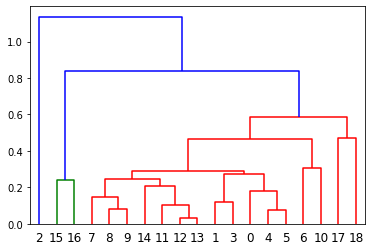

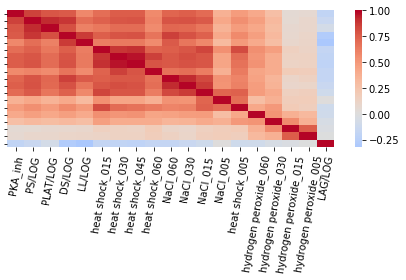

In [30]:
#Correlation heatmap with all conditions v.s. PKA inhibition. 

#First do heirarchical clustering of conditions, then reorder matrix. 
pkainh_regev_data_nanrm = pkainh_regev_data.fillna(0.0)
pkainh_regev_data_mat = pkainh_regev_data_nanrm.values.transpose()
col_cluster = sch.linkage(pkainh_regev_data_mat, method='average', metric = 'correlation')
col_dend = sch.dendrogram(col_cluster)
col_ind_reorder = col_dend['leaves']
#new columns look almost right but need to flip the tree around.  
print(col_ind_reorder)
#col_ind_reorder_pretty = [0,3,4,1,5,11,12,13,14,6,7,18,17,16,15,8,9,2]
#Reordered in order to have PKA inh in the upper left and group similar conditions without breaking tree structure. 
col_ind_reorder_pretty = [0,5,4,1,3,11,12,13,14, 9, 8, 7, 6, 10, 18, 17, 16, 15, 2]

print(col_ind_reorder_pretty)

# col_ind_reorder_branch_flip ={16 : 19, 19: 18, 18:16}
# col_ind_reorder_pretty = col_ind_reorder[:]  #Need to use slice because otherwise the two lists are linked.  This makes a copy
# for key in col_ind_reorder_branch_flip.keys():
#     ind_ind = col_ind_reorder.index(key)
#     col_ind_reorder_pretty[ind_ind] = col_ind_reorder_branch_flip[key]

old_cols = pkainh_regev_data.columns.tolist()
new_cols = [old_cols[ind] for ind in col_ind_reorder_pretty]


pkainh_regev_data_col_reorder = pkainh_regev_data[new_cols]


#Plot correlation Matrix
corr = pkainh_regev_data_col_reorder.corr()
fig2, ax = plt.subplots()
ax = sns.heatmap(corr, cmap='coolwarm', center=0.0)
ax.tick_params(axis='y',labelleft = False)
plt.setp(ax.get_xticklabels(), rotation = 80)
plt.tight_layout()
#plt.savefig('C:\Users\Ben\Google Drive\UCSF\ElSamad_Lab\Lab Meeting\\20161118\KL_corr.png')
#Clean up labels


sc_corr = corr.copy()


Th that are closest to PKA inhibition are

PS/LOG
PLAT/LOG
DS/LOG
heat shock_30
heat shock_45
NaCl_060
NaCl_030
NaCl_015

### K.Lac

In [31]:
# K.Lac

# Load Deseq data

pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_KL_AS_WT_nmpp1.csv'), index_col=0)
#remove underscore from kl genenames
pkainh_deseq['kl_genename'] = yeast_esr_exp.kl_genename_convert_list(list(pkainh_deseq.index))
pkainh_deseq.set_index('kl_genename', inplace=True)

# Load Regev Data

spec = 'Klac'
fname_array_data = os.path.normpath(data_processing_dir + 'regev_data/' + spec + '_growth_stress_norm.csv')  
spec_data = pd.read_csv(fname_array_data, index_col=0)

pkainh_deseq_LFC = pkainh_deseq.loc[:,['log2FoldChange']]
pkainh_regev_data = pkainh_deseq_LFC.merge(spec_data,how='inner',left_index=True, right_index=True)
pkainh_regev_data.rename(columns = {'log2FoldChange':'PKA_inh'}, inplace=True)


[6, 7, 10, 11, 12, 13, 14, 0, 3, 4, 1, 5, 15, 18, 16, 17, 2, 8, 9]
[0, 5, 4, 1, 3, 10, 11, 12, 13, 14, 6, 7, 8, 9, 2, 15, 16, 17, 18]


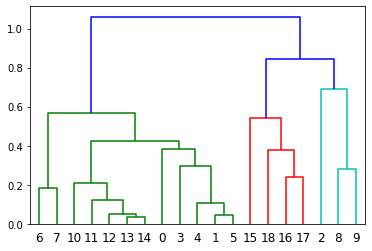

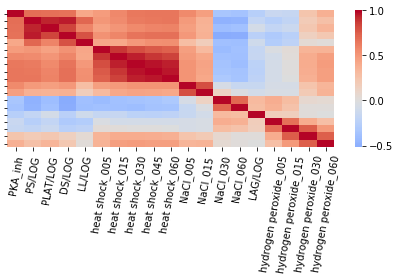

In [32]:
#Correlation heatmap with all conditions v.s. PKA inhibition. 

#First do heirarchical clustering of conditions, then reorder matrix. 
pkainh_regev_data_nanrm = pkainh_regev_data.fillna(0.0)
pkainh_regev_data_mat = pkainh_regev_data_nanrm.values.transpose()
col_cluster = sch.linkage(pkainh_regev_data_mat, method='average', metric = 'correlation')
col_dend = sch.dendrogram(col_cluster)
col_ind_reorder = col_dend['leaves']
#new columns look almost right but need to flip the tree around.  
print(col_ind_reorder)
#Reordered in order to have PKA inh in the upper left and group similar conditions without breaking tree structure. 
col_ind_reorder_pretty = [0,5,4,1,3,10,11,12,13,14, 6, 7, 8, 9, 2, 15, 16, 17, 18]

print(col_ind_reorder_pretty)

# col_ind_reorder_branch_flip ={16 : 19, 19: 18, 18:16}
# col_ind_reorder_pretty = col_ind_reorder[:]  #Need to use slice because otherwise the two lists are linked.  This makes a copy
# for key in col_ind_reorder_branch_flip.keys():
#     ind_ind = col_ind_reorder.index(key)
#     col_ind_reorder_pretty[ind_ind] = col_ind_reorder_branch_flip[key]

old_cols = pkainh_regev_data.columns.tolist()
new_cols = [old_cols[ind] for ind in col_ind_reorder_pretty]


pkainh_regev_data_col_reorder = pkainh_regev_data[new_cols]


#Plot correlation Matrix
corr = pkainh_regev_data_col_reorder.corr()
fig2, ax = plt.subplots()
ax = sns.heatmap(corr, cmap='coolwarm', center=0.0)
ax.tick_params(axis='y',labelleft = False)
plt.setp(ax.get_xticklabels(), rotation = 80)
plt.tight_layout()
#plt.savefig('C:\Users\Ben\Google Drive\UCSF\ElSamad_Lab\Lab Meeting\\20161118\KL_corr.png')
#Clean up labels


kl_corr = corr.copy()

Conditions in K.Lac closest to PKA inhibition: 

PS/LOG
PLAT/LOG
DS/LOG
heat shock_30
heat shock_45
heat shock_60


The overlap between S.Cer and K.Lac is 

PS/LOG
PLAT/LOG
DS/LOG
heat shock_30
heat shock_45

So I will use those as estimates of PKA inhibition in other species. 

In [12]:
# #Plot correlation v.s. PKA inhibition for all conditions in each species. 

# data_to_plot = sc_corr.loc[:,['PKA_inh']].merge(kl_corr.loc[:,['PKA_inh']], how='inner', left_index=True, right_index=True, suffixes=('_Scer', '_Klac'))

# xlabel = 'S.Cer correlation to PKA inh'
# ylabel = 'K.Lac correlation to PKA inh'

# data = []

# trace = pygo.Scatter(
#             x = data_to_plot['PKA_inh_Scer'], 
#             y =  data_to_plot['PKA_inh_Klac'],
#             text = list(data_to_plot.index),
#             mode = 'markers',
#             #marker = {'opacity': 0.5 }, #, 
#                       #'color': 'rgba'+str(cmap(NN/10))}, 
#             name = 'conditions' 
#         )
        
# data.append(trace)

# layout = pygo.Layout(
#     xaxis= {
#         #"range":[-20, 20],
#         "title": xlabel
#     },
#     yaxis= {
#         #"range":[-10, 10],
#         "title": ylabel
#     }
# )


# fig = pygo.Figure(data=data, layout = layout)
# py.iplot(fig, filename= 'KL_SC_vs_regev_conditions_correlation')

In [23]:
sc_corr

,PKA_inh,PS/LOG,PLAT/LOG,DS/LOG,LL/LOG,heat shock_015,heat shock_030,heat shock_045,heat shock_060,NaCl_060,NaCl_030,NaCl_015,NaCl_005,heat shock_005,hydrogen peroxide_060,hydrogen peroxide_030,hydrogen peroxide_015,hydrogen peroxide_005,LAG/LOG
PKA_inh,1.000000,0.689644,0.683943,0.671260,0.420872,0.581621,0.655315,0.658016,0.658908,-0.358542,-0.337259,0.467168,0.568759,0.487580,0.379295,0.244415,-0.156685,-0.143827,-0.253993
PS/LOG,0.689644,1.000000,0.938237,0.955920,0.723612,0.564648,0.634304,0.654539,0.656214,-0.465188,-0.481396,0.370169,0.498920,0.510807,0.273319,0.194400,-0.190525,-0.252853,-0.185040
PLAT/LOG,0.683943,0.938237,1.000000,0.849772,0.593016,0.518971,0.576772,0.598610,0.603588,-0.379302,-0.395289,0.363763,0.469952,0.457390,0.345280,0.233504,-0.138460,-0.184927,-0.077757
DS/LOG,0.671260,0.955920,0.849772,1.000000,0.799040,0.585541,0.663619,0.680332,0.684778,-0.506621,-0.518482,0.372748,0.504501,0.532635,0.218224,0.148910,-0.245595,-0.304691,-0.239369
LL/LOG,0.420872,0.723612,0.593016,0.799040,1.000000,0.428254,0.503449,0.541772,0.549592,-0.392629,-0.382253,0.177253,0.291984,0.433233,0.033151,0.052837,-0.215508,-0.270203,-0.101260
heat shock_015,0.581621,0.564648,0.518971,0.585541,0.428254,1.000000,0.941564,0.889523,0.855002,-0.383125,-0.378711,0.425033,0.494841,0.887430,0.469072,0.396582,0.032473,-0.083806,-0.162008
heat shock_030,0.655315,0.634304,0.576772,0.663619,0.503449,0.941564,1.000000,0.971074,0.950589,-0.395125,-0.363629,0.444340,0.523628,0.811090,0.488050,0.395801,0.012476,-0.069930,-0.216302
heat shock_045,0.658016,0.654539,0.598610,0.680332,0.541772,0.889523,0.971074,1.000000,0.963065,-0.364226,-0.342217,0.438744,0.524067,0.764035,0.476041,0.391784,0.014337,-0.069051,-0.222279
heat shock_060,0.658908,0.656214,0.603588,0.684778,0.549592,0.855002,0.950589,0.963065,1.000000,-0.356048,-0.312292,0.429574,0.527382,0.748201,0.472571,0.381746,-0.001362,-0.075028,-0.213520
NaCl_060,-0.358542,-0.465188,-0.379302,-0.506621,-0.392629,-0.383125,-0.395125,-0.364226,-0.356048,1.000000,0.721310,-0.018706,-0.153356,-0.376964,0.015731,0.022018,0.258600,0.370940,0.305640


In [33]:
data_to_plot

,PKA_inh_Scer,PKA_inh_Klac
PKA_inh,1.000000,1.000000
PS/LOG,0.689644,0.689644
PLAT/LOG,0.683943,0.683943
DS/LOG,0.671260,0.671260
LL/LOG,0.420872,0.420872
heat shock_015,0.581621,0.581621
heat shock_030,0.655315,0.655315
heat shock_045,0.658016,0.658016
heat shock_060,0.658908,0.658908
NaCl_060,-0.358542,-0.358542


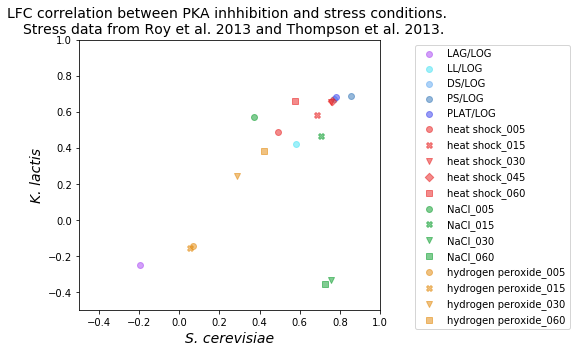

In [46]:
fig_sckl_corr, ax_sckl_corr = plt.subplots(figsize=(8,5))

data_to_plot = sc_corr.loc[:,['PKA_inh']].merge(kl_corr.loc[:,['PKA_inh']], how='inner', left_index=True, right_index=True, suffixes=('_Scer', '_Klac'))


marker_dict = OrderedDict([('LAG/LOG', ('o','#a742f4')), #purple
                           ('LL/LOG', ('o', '#41e2f4')), #light blue
                           ('DS/LOG', ('o', '#5ea8f2')), #blue
                           ('PS/LOG', ('o','#2f73b7')), 
                           ('PLAT/LOG', ('o','#363ced')),
                           ('heat shock_005',('o', '#e81919')), #red
                           ('heat shock_015',('X', '#e81919')),
                           ('heat shock_030',('v', '#e81919')),
                           ('heat shock_045', ('D', '#e81919')), 
                           ('heat shock_060', ('s', '#e81919')), 
                           ('NaCl_005', ('o','#049b27')), #green
                           ('NaCl_015', ('X','#049b27')), 
                           ('NaCl_030', ('v','#049b27')),
                           ('NaCl_060', ('s','#049b27')), 
                           ('hydrogen peroxide_005', ('o','#e28604')), #orange
                           ('hydrogen peroxide_015', ('X','#e28604')),
                           ('hydrogen peroxide_030', ('v','#e28604')),
                           ('hydrogen peroxide_060', ('s','#e28604'))
                          ])


for cond, marker_params in marker_dict.items():
    sc_corr_plot, kl_corr_plot = data_to_plot.loc[cond,:]
    ax_sckl_corr.scatter(sc_corr_plot,kl_corr_plot, color = marker_params[1], marker=marker_params[0], label = cond, alpha = 0.5)

ax_sckl_corr.set_xlim([-0.5,1.0])
ax_sckl_corr.set_ylim([-0.5,1.0])
ax_sckl_corr.set_title('LFC correlation between PKA inhhibition and stress conditions. \n  Stress data from Roy et al. 2013 and Thompson et al. 2013.', fontsize ='14')
ax_sckl_corr.set_xlabel('S. cerevisiae', style = 'italic', fontsize='14')
ax_sckl_corr.set_ylabel('K. lactis', style = 'italic', fontsize = '14')
ax_sckl_corr.legend(loc='upper left', bbox_to_anchor=(1.1, 1.00))
plt.tight_layout()

fig_sckl_corr.savefig(figsave_dir + 'stress_pka_inh_corr.svg')
